In [11]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)


options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)


load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")

## Data partition

In [12]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)
TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

## Model

In [13]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [14]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 

+ Fold01.Rep1: nIter=5 
- Fold01.Rep1: nIter=5 
+ Fold02.Rep1: nIter=5 
- Fold02.Rep1: nIter=5 
+ Fold03.Rep1: nIter=5 
- Fold03.Rep1: nIter=5 
+ Fold04.Rep1: nIter=5 
- Fold04.Rep1: nIter=5 
+ Fold05.Rep1: nIter=5 
- Fold05.Rep1: nIter=5 
+ Fold06.Rep1: nIter=5 
- Fold06.Rep1: nIter=5 
+ Fold07.Rep1: nIter=5 
- Fold07.Rep1: nIter=5 
+ Fold08.Rep1: nIter=5 
- Fold08.Rep1: nIter=5 
+ Fold09.Rep1: nIter=5 
- Fold09.Rep1: nIter=5 
+ Fold10.Rep1: nIter=5 
- Fold10.Rep1: nIter=5 
Aggregating results
Selecting tuning parameters
Fitting nIter = 4 on full training set


In [15]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost=3.627e-03, loss=L1, epsilon=1 
- Fold01.Rep1: cost=3.627e-03, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=1.409e+02, loss=L1, epsilon=1 
- Fold01.Rep1: cost=1.409e+02, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=1.122e+00, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost=1.122e+00, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost=3.627e-03, loss=L1, epsilon=1 
- Fold02.Rep1: cost=3.627e-03, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=1.409e+02, loss=L1, epsilon=1 
- Fold02.Rep1: cost=1.409e+02, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=1.122e+00, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost=1.122e+00, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost=3.627e-03, loss=L1, epsilon=1 
- Fold03.Rep1: cost=3.627e-03, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=1.409e+02, loss=L1, epsilon=1 
- Fold03.Rep1: cost=1.409e+02, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=1.122e+00, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost=1.122e+00, loss=L2_primal, epsilon=1 
+ Fold04.Rep1: cost=3.627e-03, loss=L1, 

## Results

Boosted Logistic Regression 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 672, 673, 671, 673, 672, 671, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  4      0.6120024  0.2897045
  5      0.5767479  0.2211651

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 4.


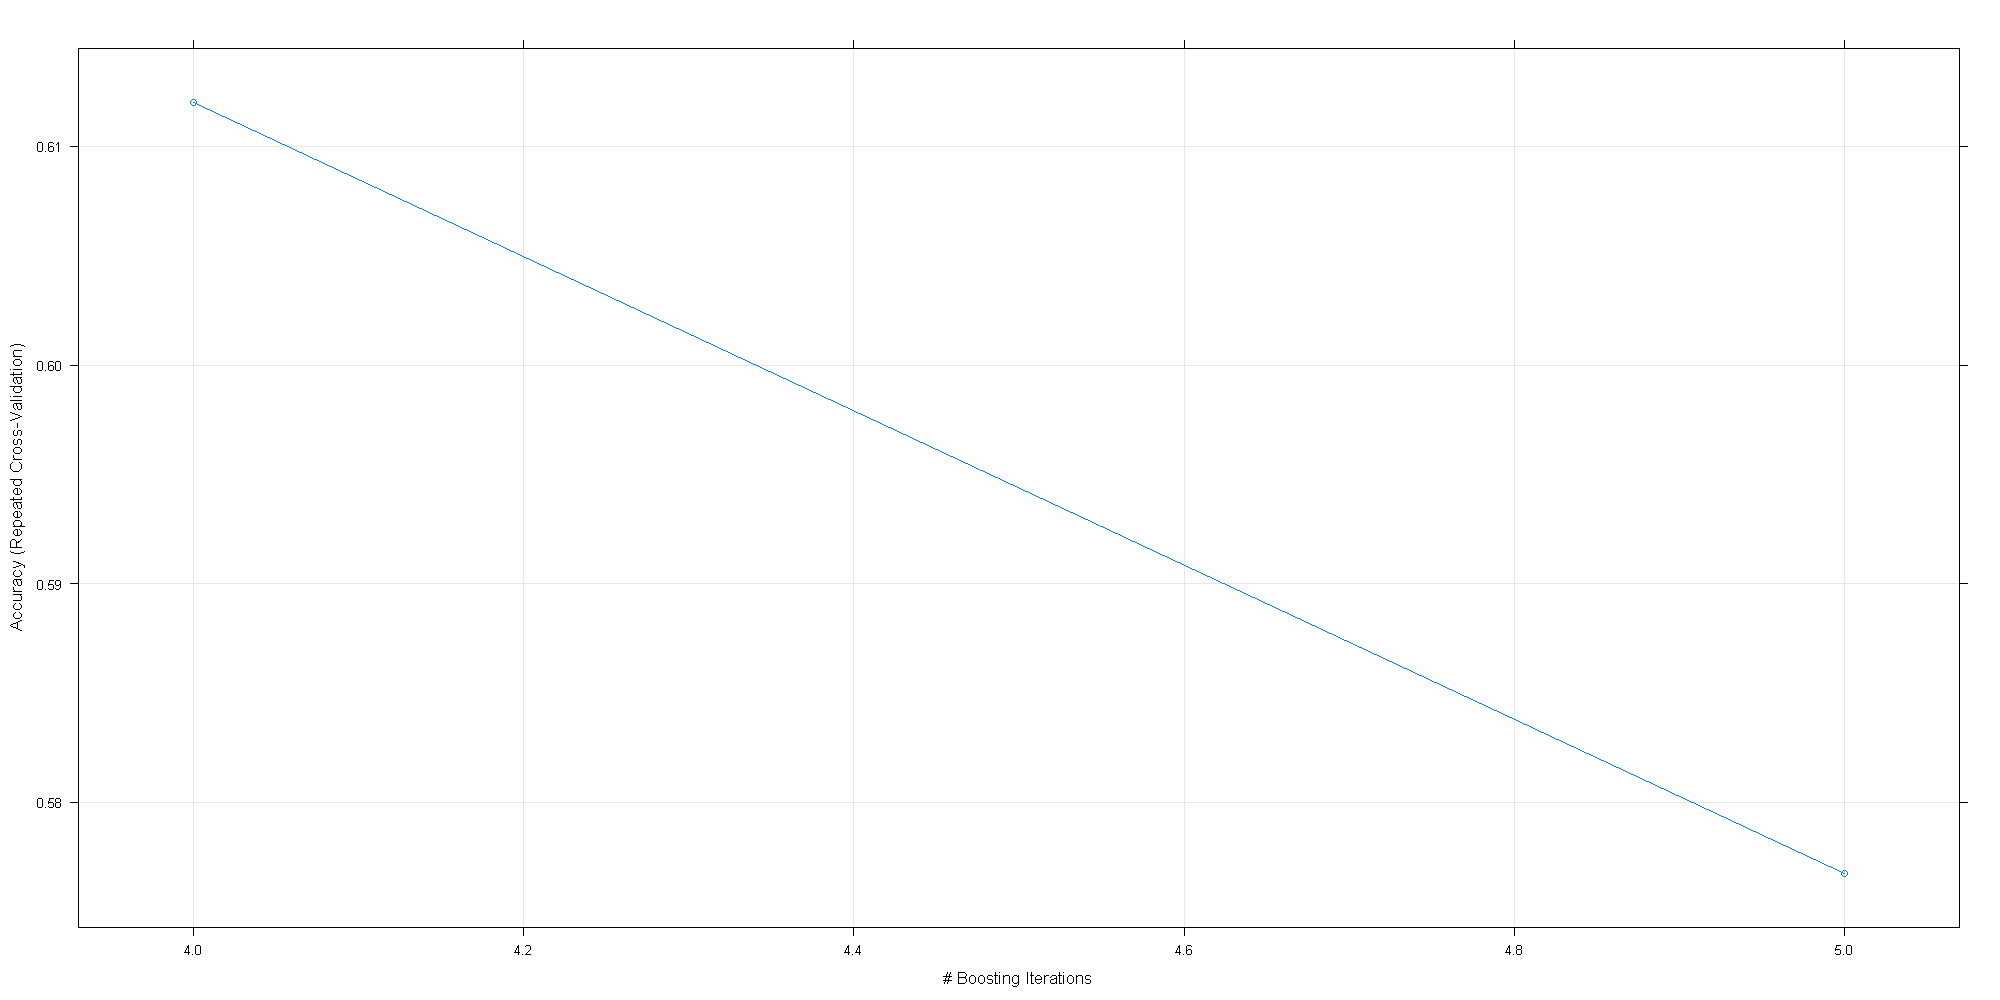

In [23]:
print(model_logitBoost)
plot(model_logitBoost)

Regularized Logistic Regression 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 673, 672, 673, 672, 672, 672, ... 
Resampling results across tuning parameters:

  cost          loss       Accuracy   Kappa    
  3.627157e-03  L1         0.1685405  0.0000000
  1.122252e+00  L2_primal  0.5650270  0.2253992
  1.409412e+02  L1         0.5607928  0.2329419

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 1.122252, loss = L2_primal
 and epsilon = 1.


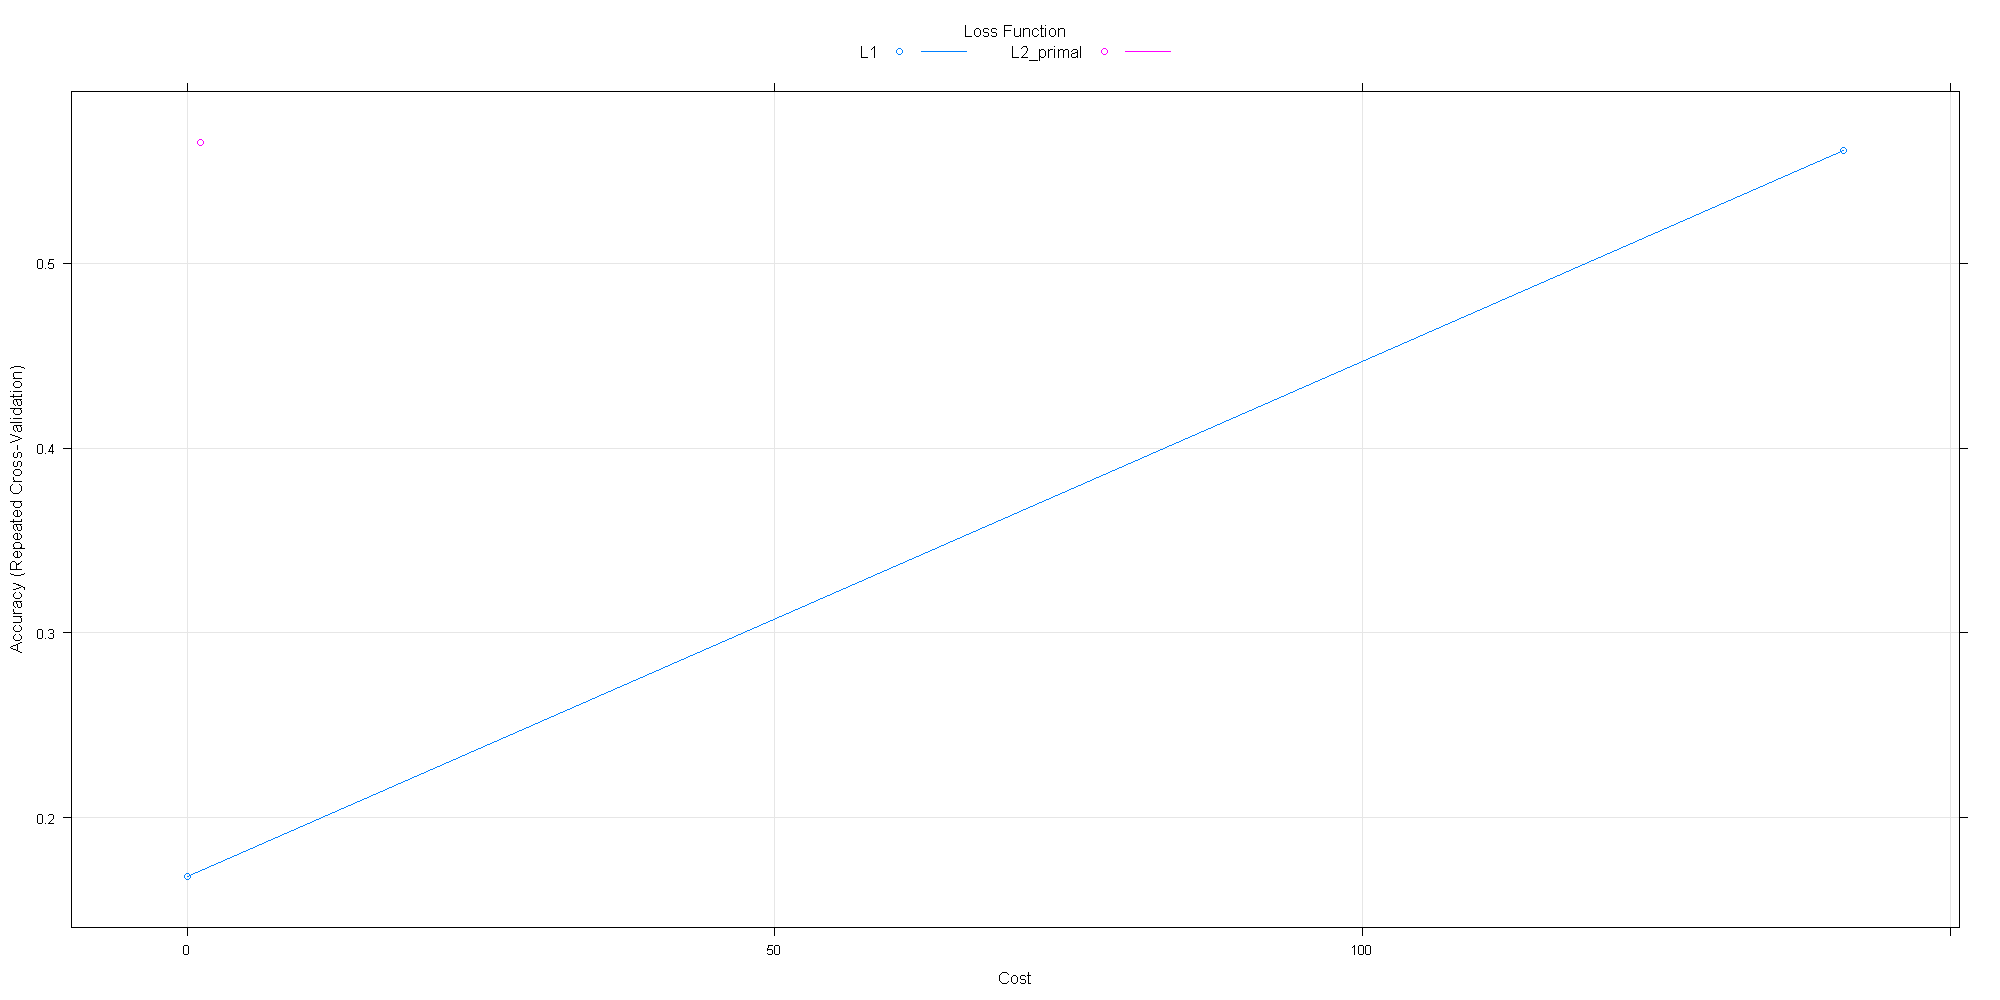

In [24]:
print(model_regLogistic)
plot(model_regLogistic)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.4375000 0.5567647 0.6020833 0.6120024 0.6804361 0.7647059    0
regLogistic 0.5066667 0.5366667 0.5637838 0.5650270 0.5852703 0.6266667    0

Kappa 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.05676856 0.1939752 0.2424626 0.2897045 0.4237106 0.5675676    0
regLogistic 0.13685848 0.1755904 0.2150563 0.2253992 0.2512092 0.3401274    0


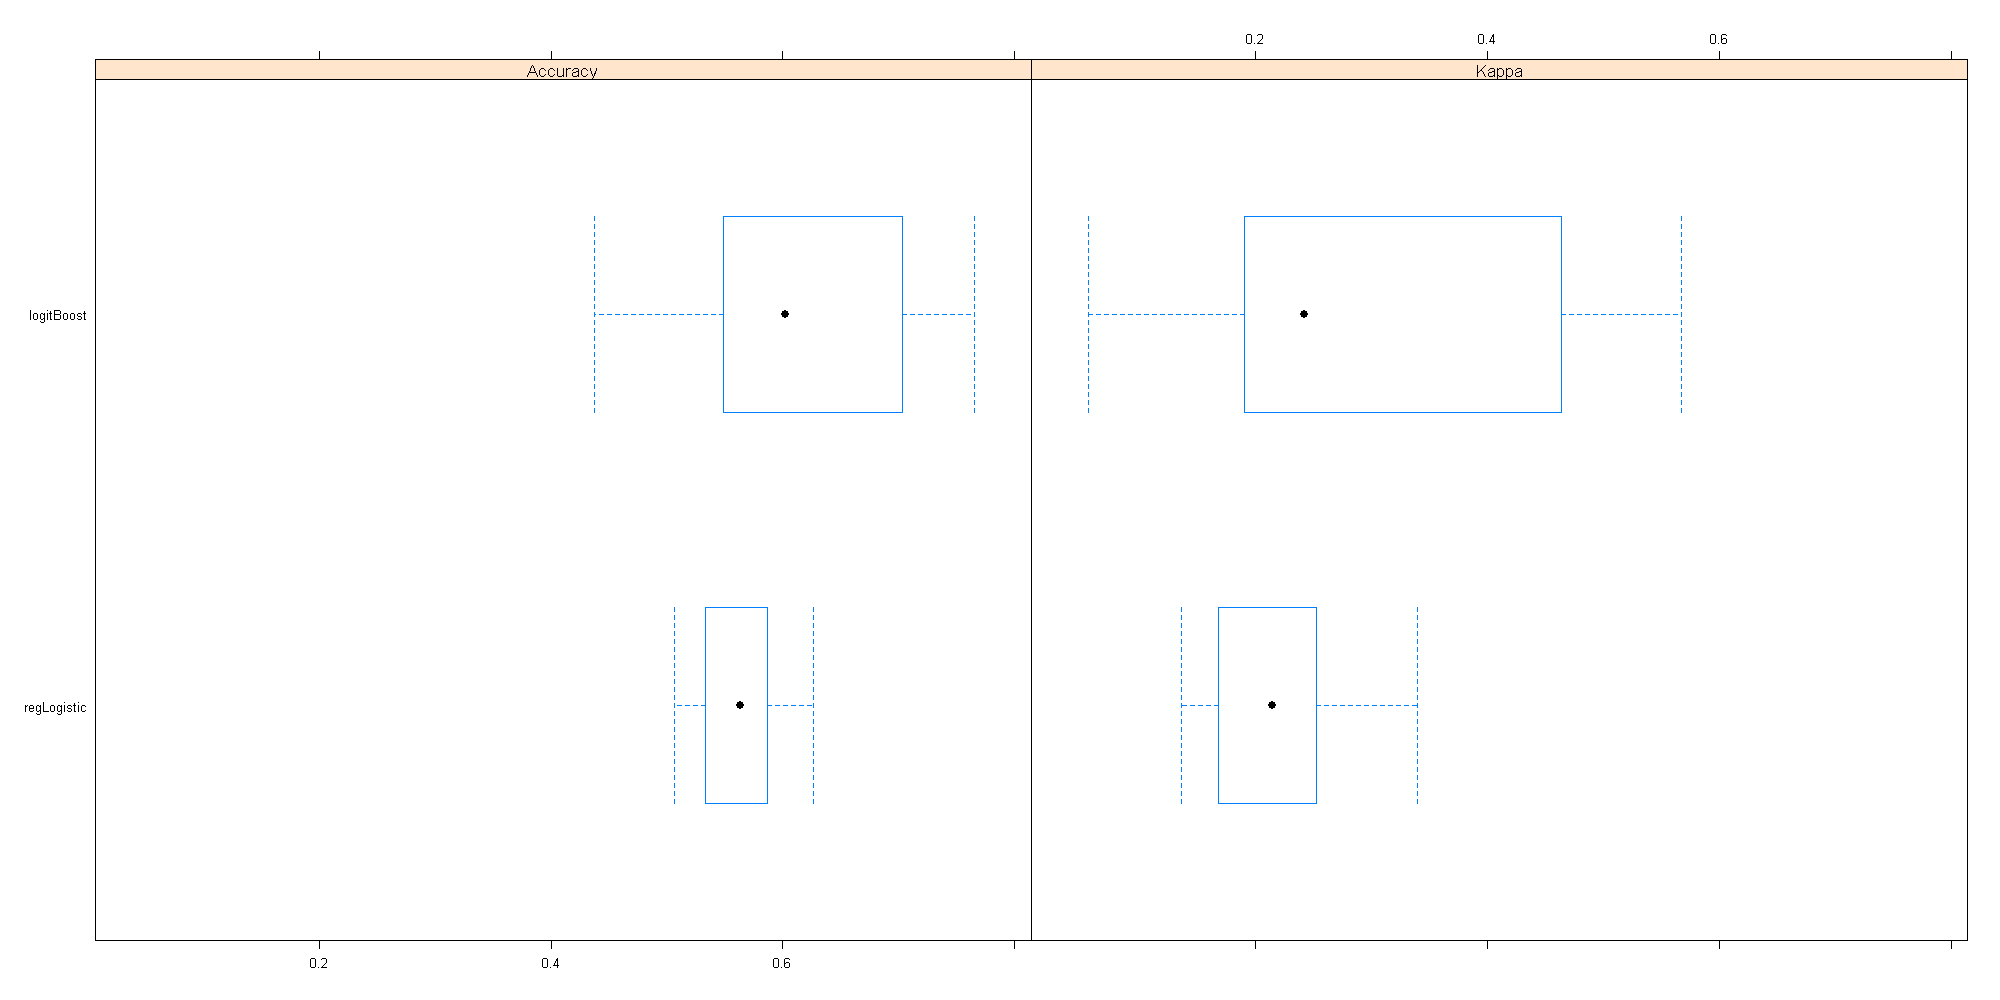

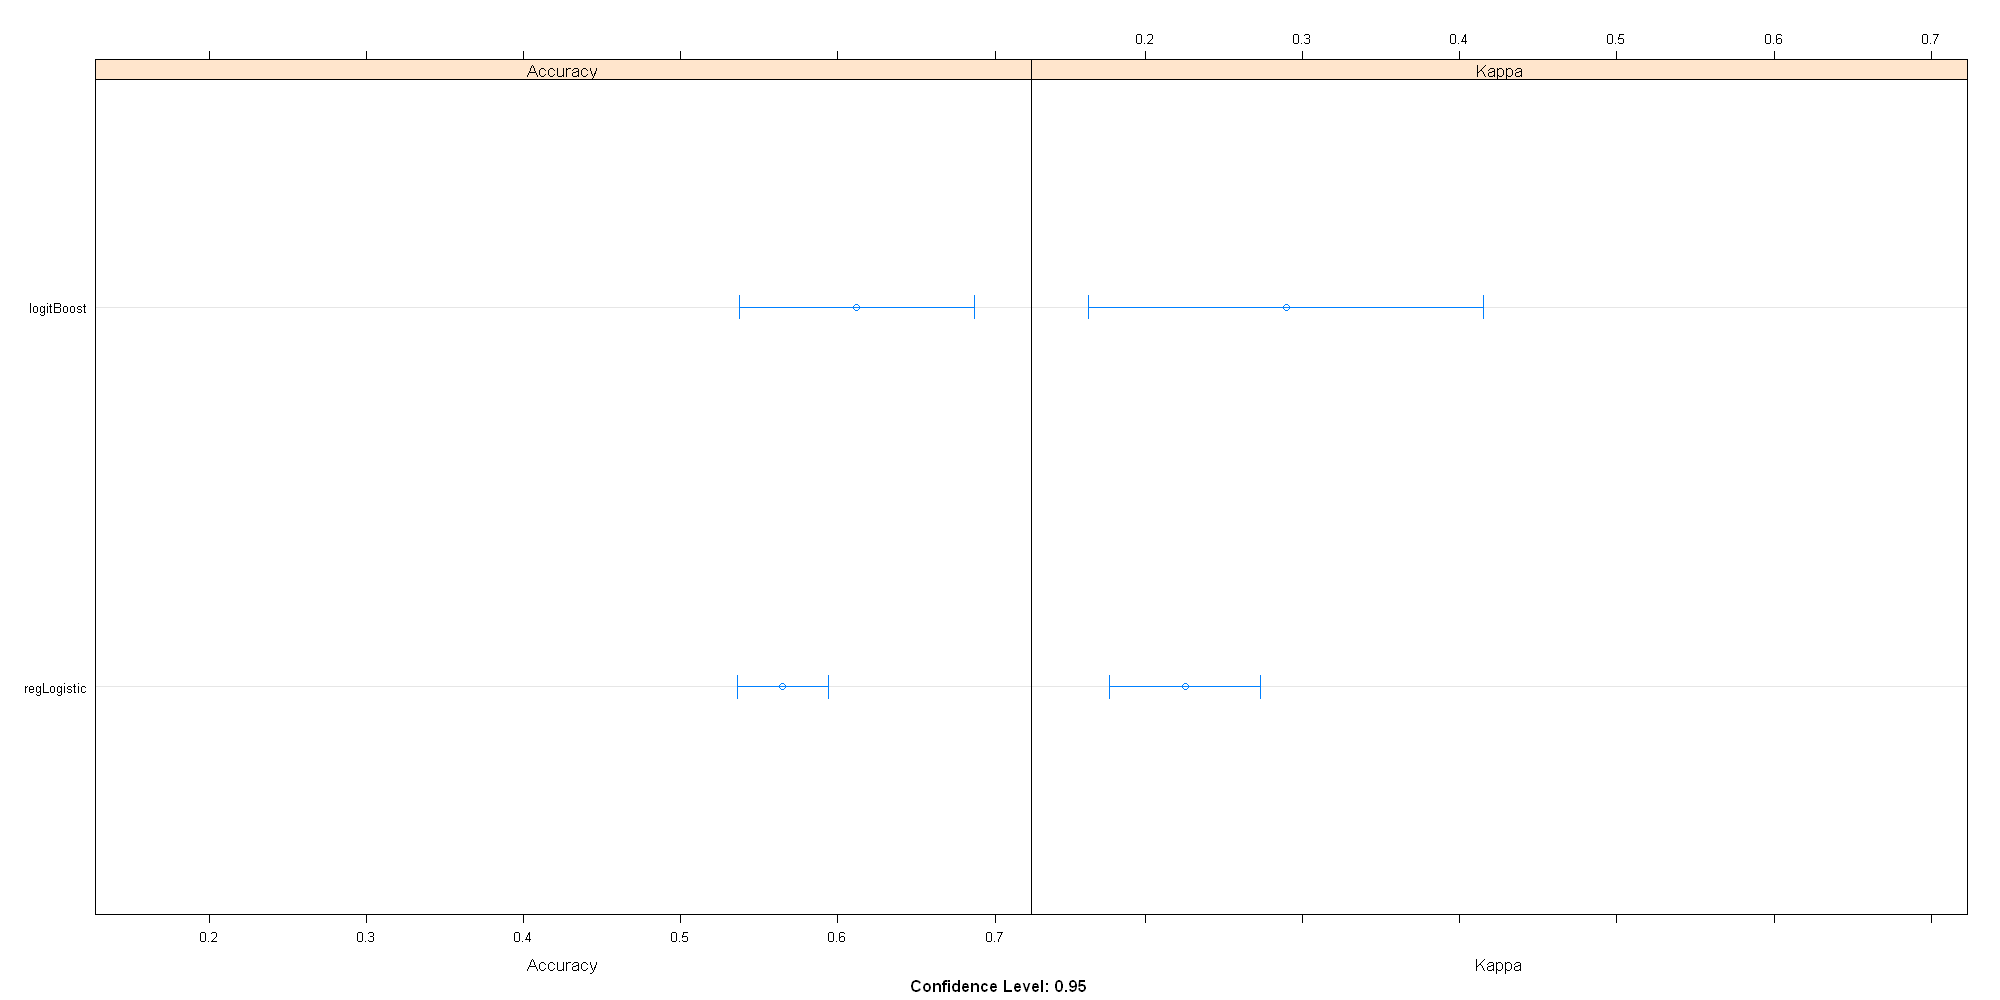

In [25]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [26]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile          74         25      0
  Complicato           40         40      0
  Ottimo               15          3      0

Overall Statistics
                                          
               Accuracy : 0.5787          
                 95% CI : (0.5064, 0.6485)
    No Information Rate : 0.6548          
    P-Value [Acc > NIR] : 0.9891          
                                          
                  Kappa : 0.2062          
                                          
 Mcnemar's Test P-Value : 8.442e-05       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.5736            0.5882            NA
Specificity                      0.6324            0.6899       0.90863
Pos Pred Value                   0.7475            0.5000            NA
Neg Pred Value                   0.4388           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.5736434,0.6323529,0.7474747,0.4387755,0.7474747,0.5736434,0.6491228,0.6548223,0.3756345,0.50253807,0.6029982
Class: Complicato,0.5882353,0.6899225,0.5000000,0.7606838,0.5000000,0.5882353,0.5405405,0.3451777,0.2030457,0.40609137,0.6390789
Class: Ottimo,NA,0.9086294,NA,NA,0.0000000,NA,NA,0.0000000,0.0000000,0.09137056,NA


In [ ]:
roc_logitBoost <- multiclass.roc(TestClasses, as.numeric(pred_logitBoost))
roc_logitBoost


direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

In [28]:
pred_logitBoost.prob

Accettabile,Complicato,Ottimo
0.4467465,0.10650698,0.44674651
0.4911658,0.49116579,0.01766842
0.6771344,0.16143280,0.16143280
0.6771344,0.16143280,0.16143280
0.4911658,0.49116579,0.01766842
0.7846964,0.18707620,0.02822743
0.4467465,0.10650698,0.44674651
0.4467465,0.44674651,0.10650698
0.4467465,0.10650698,0.44674651
0.3333333,0.58719805,0.07946861
